# CEO-Request Challenge

#### How can Olist Improve its profits?

## 1. OLIST Financials 💰

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from IPython.display import Markdown as md


/home/matias/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from olist.seller import Seller
seller = Seller()


In [3]:
sellers = seller.get_training_data()


In [4]:
sellers.head()


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201


### 💰 Revenues_

**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

In [5]:
# Revenues
revenues_sales = sellers.sales.sum() * 0.1
revenues_subscription = sellers.months_on_olist.sum() * 80
revenues_total = sellers.revenues.sum()

print(
    f'''
Revenues: {revenues_total:.2f} BRL
- Sales: {revenues_sales:.2f} BRL
- Subscriptions: {revenues_subscription:.2f} BRL
''')



Revenues: 2785818.44 BRL
- Sales: 1355578.44 BRL
- Subscriptions: 1430240.00 BRL



### 💰 _Costs_

**Reputation costs** *estimated* per order with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:
```python
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of products that was ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

In [8]:
costs_reviews = sellers.cost_of_reviews.sum()
costs_it = 500_000
costs_total = costs_reviews + costs_it

print(
    f'''
Costs: {costs_total:.2f} BRL
- Reviews: {costs_reviews:.2f} BRL
- IT: {costs_it:.2f} BRL
''')



Costs: 2118210.00 BRL
- Reviews: 1618210.00 BRL
- IT: 500000.00 BRL



### 💰 _Profits_

In [9]:
# Gross Profit, before IT costs
profits_gross = sellers.profits.sum()
profits_gross


1167608.4440000001

In [10]:
# Gross Profit, after IT costs
profits_net = profits_gross - costs_it
profits_net


667608.4440000001

In [11]:
init_notebook_mode(connected=True)

fig = go.Figure(go.Waterfall(
    orientation = "v",
    measure = ["relative", "relative", "total", "relative", "total", "relative", "total"],
    x = ["Monthly subcriptions", "Sales fees", "Total Revenues", "Reviews costs", "Gross Profit", "It costs", "Net Profit"],
    textposition = "outside",
#    text = ["", "+80", "", "-40", "-20", "Total"],
    y = [revenues_subscription, revenues_sales, 0, -costs_reviews, 0,-costs_it, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = {'text': "Olist Profit & Loss (BRL)",
                 'yanchor': 'top',
                 'xanchor': 'left',
                 'xref': 'paper',
                 'font': {'size': 36}},
        showlegend = False
)

fig.show()


# 2.  How to handle under-performing sellers to increase profit ❓

#### 2.1 🕵️ What is an under-performing seller?

In [13]:
# Total number of sellers
n_sellers = sellers.shape[0]
# Number of sellers with negative profits
n_negative = sellers.query('profits <= 0').shape[0]
# % of sellers with negative profits
pct_negative = n_negative / n_sellers
# Mean and median of sellers'profits
mean, med = sellers.profits.mean(), sellers.profits.median()
# .25 quantile
q25 = sellers.profits.quantile(q=.25)
# Min, Max of sellers'profits
min_, max_ = sellers.profits.min(), sellers.profits.max()


In [14]:
n_sellers, n_negative, pct_negative, mean, med, q25, min_, max_


(2967,
 376,
 0.1267273340074149,
 393.5316629592181,
 254.37,
 20.98,
 -21519.517,
 18067.605)

There are **2967** sellers on Olist :
- **376 (12.6%)** of them generate a **negative profit**  
- Profits across sellers from **-21k** to **18k** BRL  
- The average profit per seller is **393** BRL  
- **50%** of sellers generate at least a profit of **254** BRL  
- **25%** of sellers generate a profit inferior to **30** BRL

In [15]:
STYLES = {'title': {'weight':'heavy', 'name':'Liberation Serif', 'size':16,},
          'labels': {'weight': 'heavy', 'name': 'Liberation Serif', 'size': 14}}


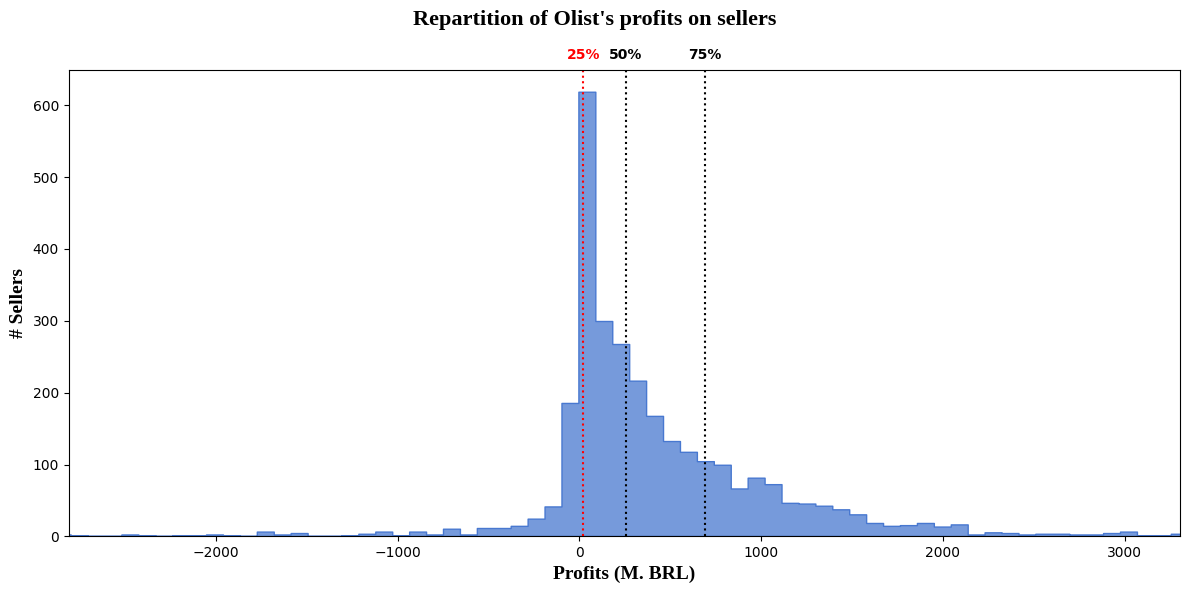

In [16]:
sns.set_palette('muted')

fig, ax = plt.subplots(figsize=(12, 6))

plt.suptitle(t="Repartition of Olist's profits on sellers",
             **STYLES['title'])

sns.histplot(sellers.profits,
             stat='count',
             element='step',
             ax=ax)

quantiles = sellers.profits.quantile(q=[.01, .25, .5, .75, .99])

ax.set_xlim(quantiles.iloc[0], quantiles.iloc[-1])
ax.set_xlabel(xlabel='Profits (M. BRL)',
              fontdict=STYLES['labels'])
ax.set_ylabel(ylabel='# Sellers',
              fontdict=STYLES['labels'])

for p, q in quantiles.iloc[1:-1].items():
    c_ = 'black'
    if p == .25:
        c_ = 'red'
    ax.axvline(x=q,
               color=c_,
               ls=':')
    ax.text(x=q,
            y=ax.get_yticks()[-1] - 30,
            s=f'{p:.0%}',
            color=c_,
            ha='center',
            va='center',
            weight='bold')

fig.tight_layout();


#### 2.2 👩🏻‍⚖️ Decision

We will consider the **742** sellers that yielded a profit inferior to **30** BRL as **under-performers**

## 3. 🔮 What-if Analysis

💡 Let's see the financial impact of **removing sellers**, starting from the **less profitable one** <br>
💡 We **rank** the sellers by **increasing profits**, and estimate the **costs** and **revenues** after removing them from Olist over the past 16 months

In [17]:
sorted_sellers = sellers.sort_values(by='profits') \
                    [['months_on_olist',
                      'sales',
                      'profits',
                      'revenues',
                      'quantity',
                      'cost_of_reviews']] \
                    .reset_index()

sorted_sellers.head()


,index,months_on_olist,sales,profits,revenues,quantity,cost_of_reviews
0,769,18.0,123304.83,-21519.517,13770.483,2033,35290
1,2358,20.0,200472.92,-17752.708,21647.292,1987,39400
2,1357,19.0,104288.42,-17581.158,11948.842,1775,29530
3,945,12.0,37177.52,-15542.248,4677.752,1203,20220
4,315,10.0,17535.69,-12886.431,2553.569,1018,15440


In [18]:
gross_profits_per_seller_removed = profits_gross - np.cumsum(sorted_sellers.profits[:-1])
review_costs_per_seller_removed = costs_reviews - np.cumsum(sorted_sellers.cost_of_reviews[:-1])
revenues_per_seller_removed = revenues_total - np.cumsum(sorted_sellers.revenues[:-1])


### 3.1 💰 Revenues

In [19]:
fees_per_seller_removed = revenues_sales - np.cumsum(sorted_sellers.sales[:-1] * .1)
suscriptions_per_seller_removed = revenues_subscription - np.cumsum(sorted_sellers.months_on_olist[:-1] * 80)


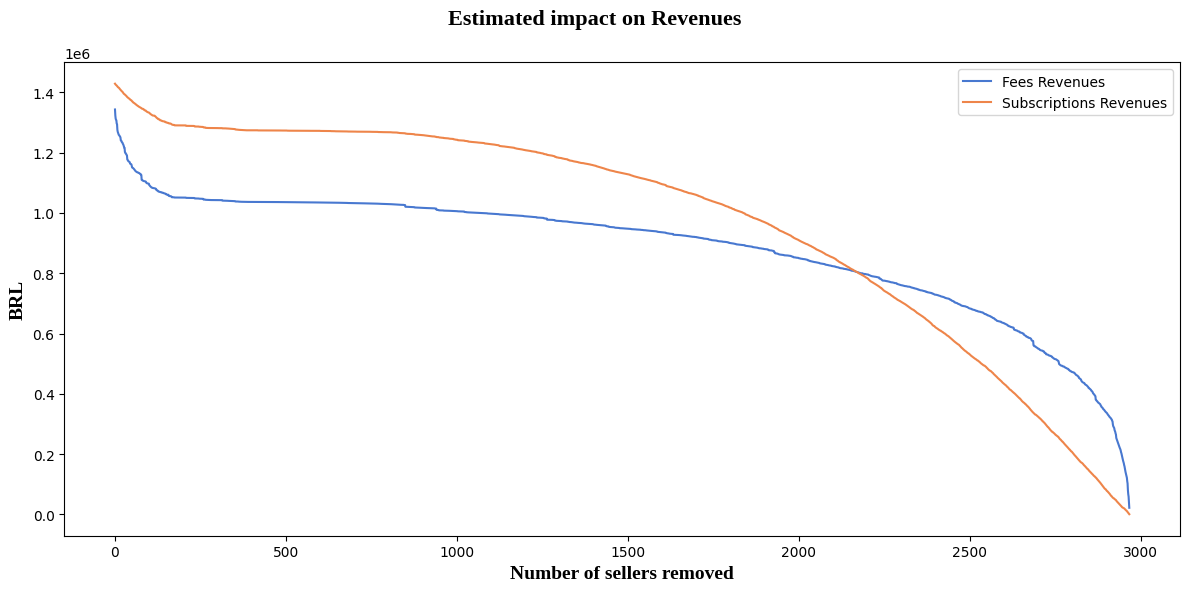

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, n_sellers, 1)

plt.suptitle(t="Estimated impact on Revenues",
             **STYLES['title'])

profit_line = sns.lineplot(x=x,
                           y=fees_per_seller_removed,
                           label='Fees Revenues',
                           ax=ax)

revenue_line = sns.lineplot(x=x,
                            y=suscriptions_per_seller_removed,
                            label='Subscriptions Revenues',
                            ax=ax)

ax.set_xlabel('Number of sellers removed',
                  fontdict=STYLES['labels'])
ax.set_ylabel('BRL',
                  fontdict=STYLES['labels'])

ax.tick_params(axis='y')

ax.legend()

fig.tight_layout()


### 3.2 💰 IT Costs scaling parameters $\alpha$ and $\beta$

We know that the total IT Costs scale with both the number of sellers (`n_sellers`) and the amount of products they sold (`n_products`)  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  

- $\alpha = 3157.27$
- $\beta = 978.23$

In [21]:
alpha, beta = 3157.27, 978.23
n_sellers = sellers.shape[0]
n_products = sellers.quantity.sum()


In [22]:
def compute_costs_of_it(n_sellers, n_products):
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_products)


In [23]:
new_n_sellers = n_sellers - np.arange(1, n_sellers, 1)
new_n_products = n_products - np.cumsum(sorted_sellers.quantity[:-1])

it_costs_per_seller_removed = compute_costs_of_it(new_n_sellers, new_n_products)
review_costs_per_seller_removed = sellers.cost_of_reviews.sum() - np.cumsum(sorted_sellers.cost_of_reviews[:-1])

costs_per_seller_removed = it_costs_per_seller_removed + review_costs_per_seller_removed


### 3.3 💰 Costs

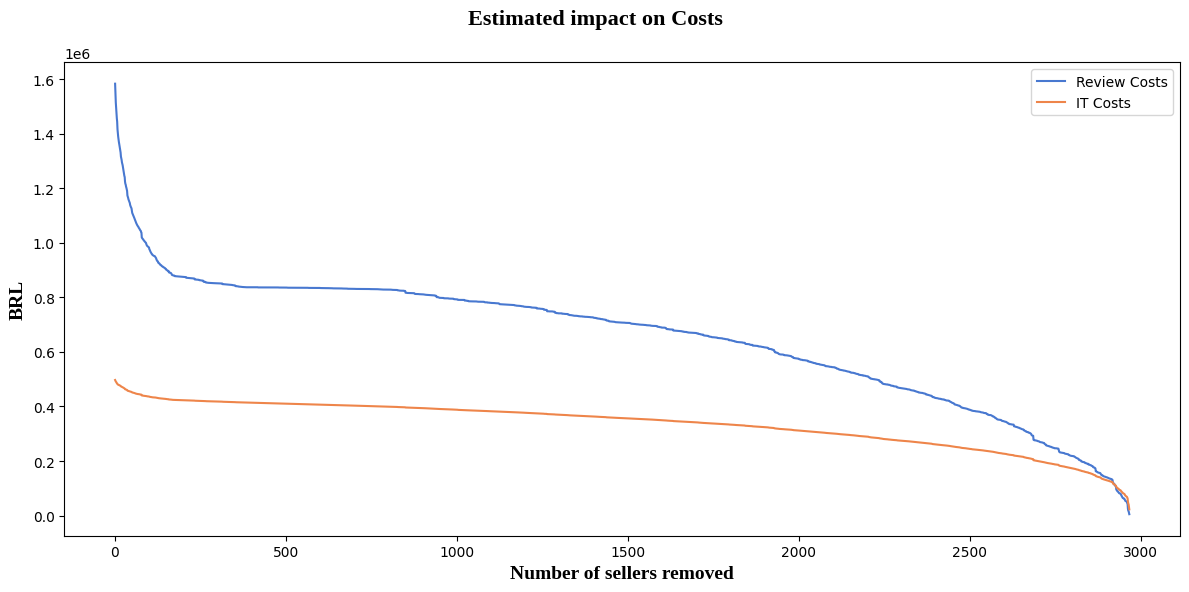

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, n_sellers, 1)

plt.suptitle(t="Estimated impact on Costs",
             **STYLES['title'])

profit_line = sns.lineplot(x=x,
                           y=review_costs_per_seller_removed,
                           label='Review Costs',
                           ax=ax)

revenue_line = sns.lineplot(x=x,
                            y=it_costs_per_seller_removed,
                            label='IT Costs',
                            ax=ax)

ax.set_xlabel('Number of sellers removed',
                  fontdict=STYLES['labels'])
ax.set_ylabel('BRL',
                  fontdict=STYLES['labels'])

ax.tick_params(axis='y')

ax.legend()

fig.tight_layout()


**💡 Removing the less profitable sellers nets a great decrease of the estimated costs of bad reviews**  
**💡 IT Costs seem less relevant to this analysis**

In [24]:
# Compute final metrics (profits and margin, for each scenario!)
profits_per_seller_removed = gross_profits_per_seller_removed - it_costs_per_seller_removed
margin_per_seller_removed = profits_per_seller_removed / revenues_per_seller_removed


##  4. ⚖️ How many under-performers to remove?

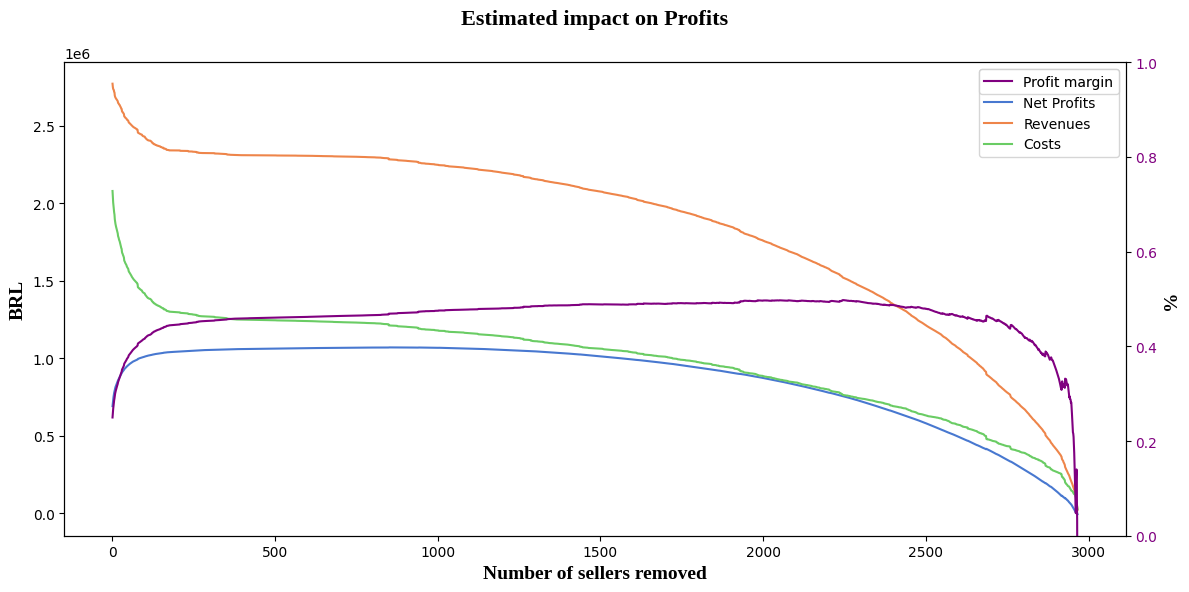

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

axs = [ax, ax.twinx()]

x = np.arange(1, n_sellers, 1)

plt.suptitle(t="Estimated impact on Profits",
             **STYLES['title'])

profit_line = sns.lineplot(x=x,
                           y=profits_per_seller_removed,
                           label='Net Profits',
                           ax=axs[0])

revenue_line = sns.lineplot(x=x,
                            y=revenues_per_seller_removed,
                            label='Revenues',
                            ax=axs[0])

costs_line = sns.lineplot(x=x,
                          y=costs_per_seller_removed,
                          label='Costs',
                          ax=axs[0])

axs[0].set_xlabel('Number of sellers removed',
                  fontdict=STYLES['labels'])
axs[0].set_ylabel('BRL',
                  fontdict=STYLES['labels'])

axs[0].tick_params(axis='y')

margin_line = sns.lineplot(x=x,
                           y=margin_per_seller_removed,
                           label='Profit margin',
                           color='purple',
                          ax=axs[1])

axs[1].set_ylabel('%',
                  fontdict=STYLES['labels'])
axs[1].tick_params(axis='y',
                   labelcolor='purple')
axs[1].set(ylim=[0, 1])

lines = [axs[1].lines[0], *axs[0].lines]
labels = [line.get_label() for line in lines]
axs[0].legend(lines, labels)

fig.tight_layout()


In [27]:
# Find optimal number of sellers to remove
profits_per_seller_removed.argmax(), profits_per_seller_removed.argmax() / n_sellers, \
margin_per_seller_removed.argmax(), margin_per_seller_removed.argmax() / n_sellers


(854, 0.2878328277721604, 2244, 0.756319514661274)

## 5. 📝 Conclusion

- Optimizing for **profits** requires removing **854 (29%)** sellers
- Optimizing for the **profit margin** requires removing **2244 (76%)** sellers  